# Prophet section

## module imports

In [1]:
import os
import sys

import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
from pylab import rcParams
import scipy
from scipy.stats import pearsonr

from prophet import Prophet
import json
from prophet.plot import plot_plotly, plot_components_plotly

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
#                                       \/
#                   The Augmented Dickey-Fuller test can be used to test 
#                   whether a given time series is stationary or not
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
#                    \/
#       responsible for displaying the progress bar
from itertools import product

import warnings
warnings.filterwarnings('ignore')
%matplotlib widget


In [2]:
plt.rcParams['figure.figsize'] = [10,10]

## calling the csv data

In [3]:
temp1 = pd.read_csv('/Users/stephenshaeffer/Desktop/TXT-CSV/temperature_sation1.csv')
temp1

,y,ds
0,67,2023-04-12
1,67,2023-04-12
2,66,2023-04-12
3,67,2023-04-12
4,66,2023-04-12
...,...,...
4522,77,2023-03-27
4523,78,2023-03-27
4524,78,2023-03-27
4525,78,2023-03-27


## defining the "m" method 

In [4]:
m = Prophet()
m.fit(temp1)

10:51:32 - cmdstanpy - INFO - Chain [1] start processing
10:51:33 - cmdstanpy - INFO - Chain [1] done processing


## defining prediction dataframes

In [5]:
tempDayfuture = m.make_future_dataframe(periods=1)

In [6]:
tempWeekfuture = m.make_future_dataframe(periods=7)

In [7]:
temp2Weekfuture = m.make_future_dataframe(periods=14)

## utilizing the prediction data frames with the "predict" method

In [8]:
tempDayforecast = m.predict(tempDayfuture)
tempDayforecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-03-27,68.755081,60.341903,77.320320
1,2023-03-28,64.551759,55.906661,72.567203
2,2023-03-29,57.820453,49.558063,66.953666
3,2023-03-30,62.680851,53.946790,72.033248
4,2023-03-31,72.920513,64.271150,80.837494
5,2023-04-01,66.175003,57.813098,74.336684
6,2023-04-02,71.177127,62.650763,79.657602
7,2023-04-03,76.695780,68.197926,85.246406
8,2023-04-04,76.127934,67.634495,84.266830
9,2023-04-05,69.019375,59.875390,77.391382


In [9]:
tempWeekforecast = m.predict(tempWeekfuture)
tempWeekforecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-03-27,68.755081,59.861549,78.285161
1,2023-03-28,64.551759,55.753139,73.282836
2,2023-03-29,57.820453,49.438178,66.160173
3,2023-03-30,62.680851,54.356473,71.349269
4,2023-03-31,72.920513,64.149715,81.974005
5,2023-04-01,66.175003,57.324685,74.815334
6,2023-04-02,71.177127,62.183315,79.334374
7,2023-04-03,76.695780,68.314233,85.072883
8,2023-04-04,76.127934,67.565993,84.589779
9,2023-04-05,69.019375,59.747006,77.555796


In [10]:
temp2Weekforecast = m.predict(temp2Weekfuture)
temp2Weekforecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-03-27,68.755081,59.445445,77.184158
1,2023-03-28,64.551759,56.176829,73.744103
2,2023-03-29,57.820453,48.920447,66.984258
3,2023-03-30,62.680851,53.793069,71.520050
4,2023-03-31,72.920513,64.198417,81.683158
5,2023-04-01,66.175003,57.310554,74.898792
6,2023-04-02,71.177127,62.525372,79.569067
7,2023-04-03,76.695780,67.823677,85.494495
8,2023-04-04,76.127934,67.564354,85.044885
9,2023-04-05,69.019375,60.196882,77.512380


## plotting the 24 hour forcasting

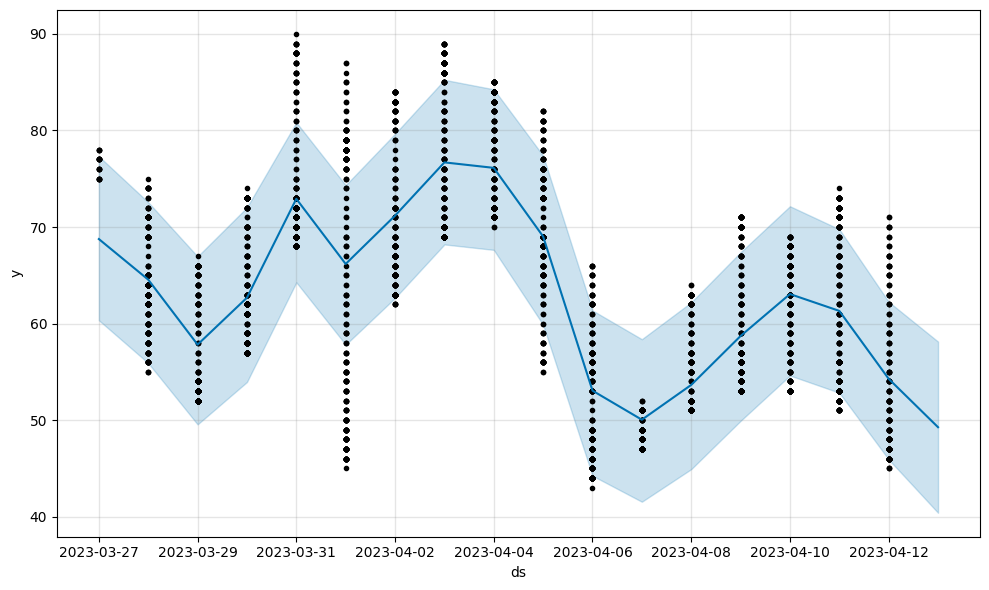

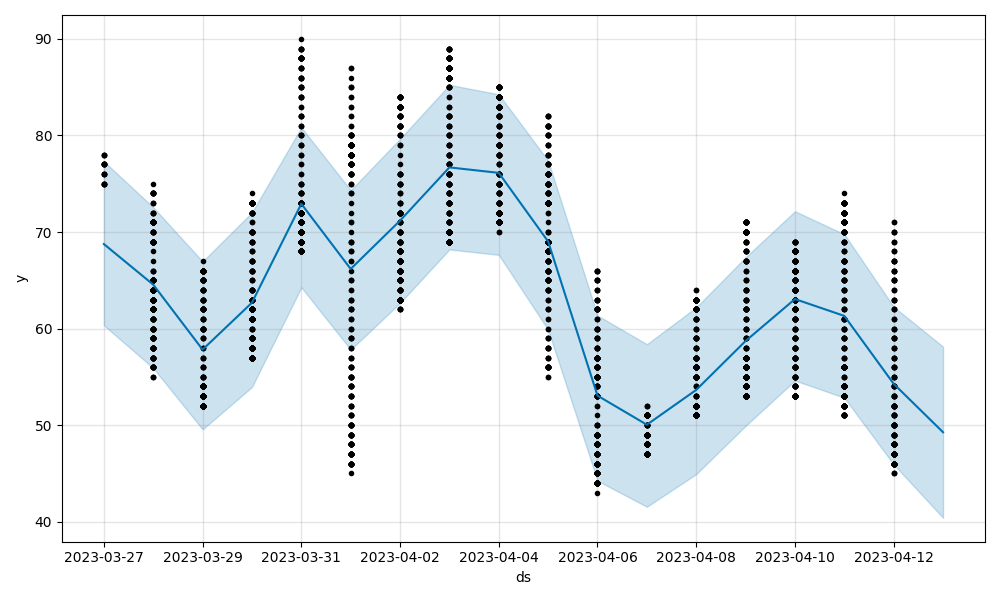

In [11]:
# forcast 1
m.plot(tempDayforecast)


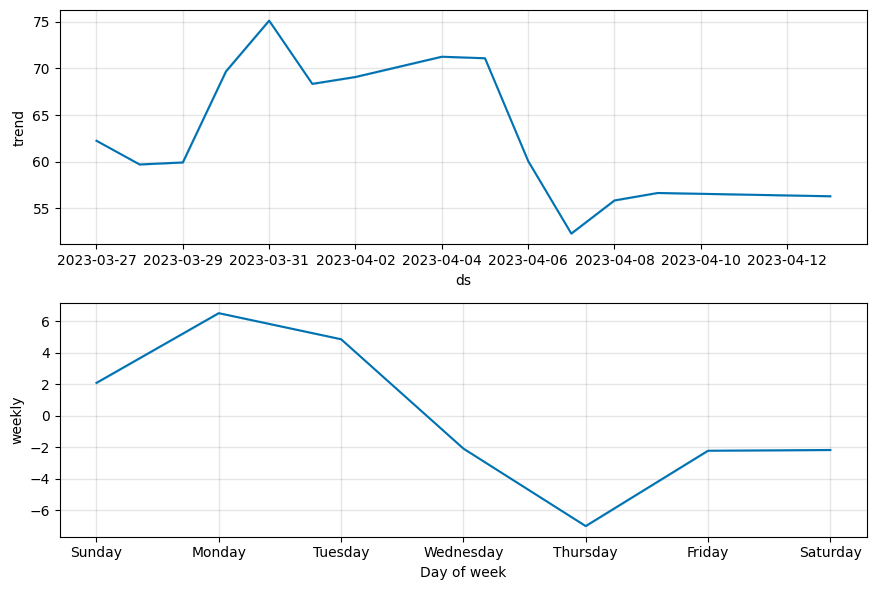

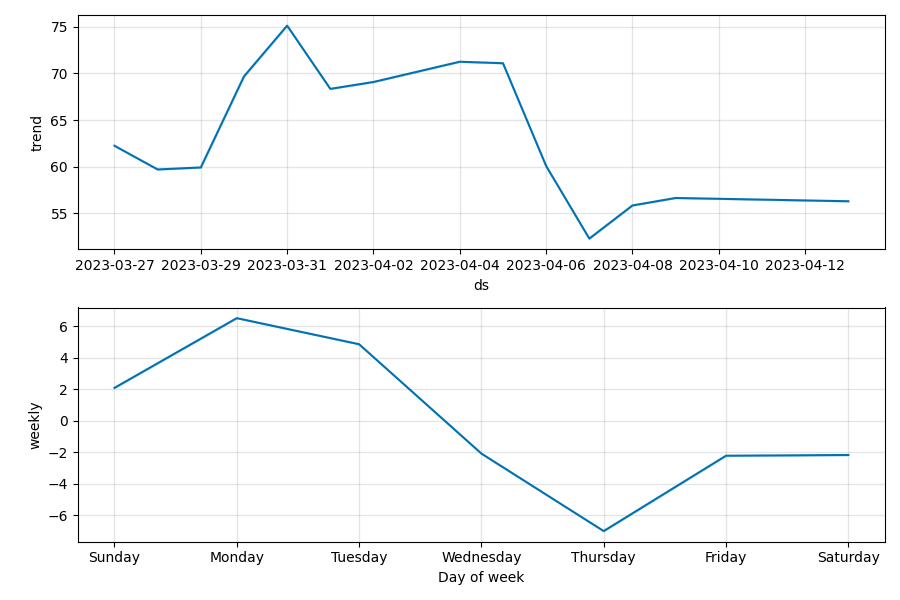

In [12]:
# forcast 2
m.plot_components(tempDayforecast)

In [13]:
# forcast 3
plot_plotly(m, tempDayforecast)

In [14]:
# forcast 4
plot_components_plotly(m, tempDayforecast)

## plotting the weekly forcasting

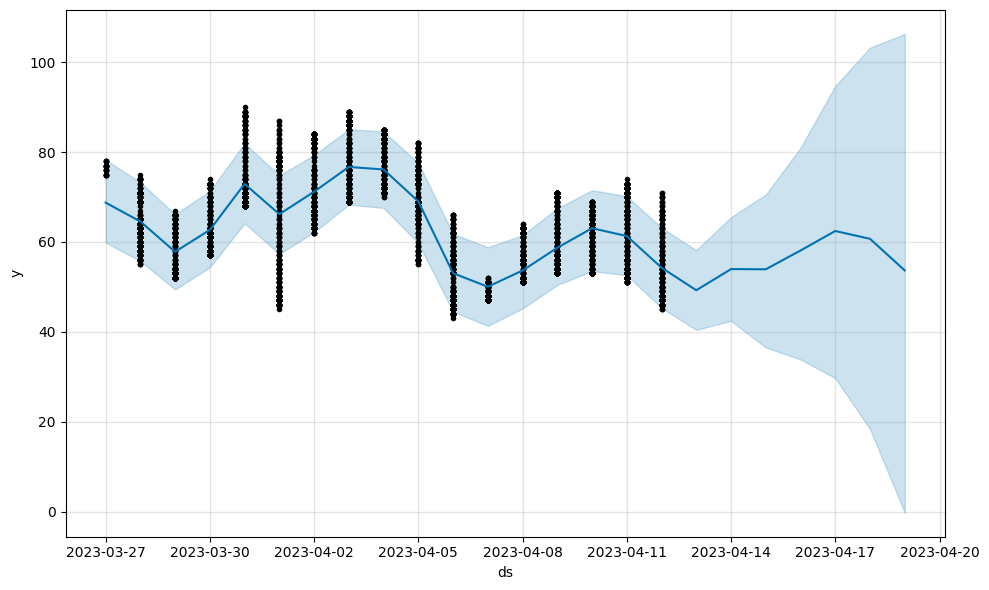

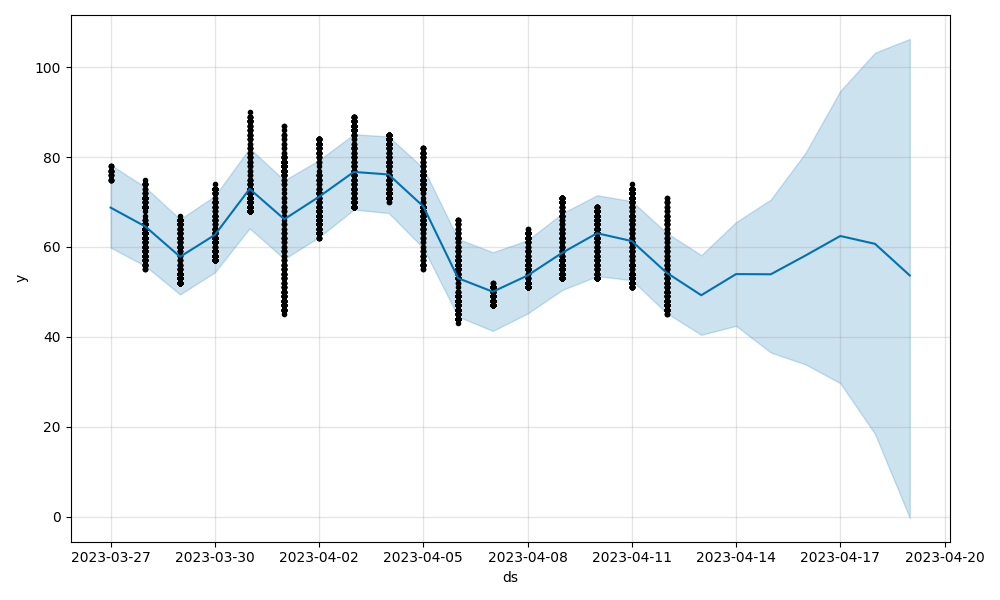

In [15]:
# forcast 1
m.plot(tempWeekforecast)

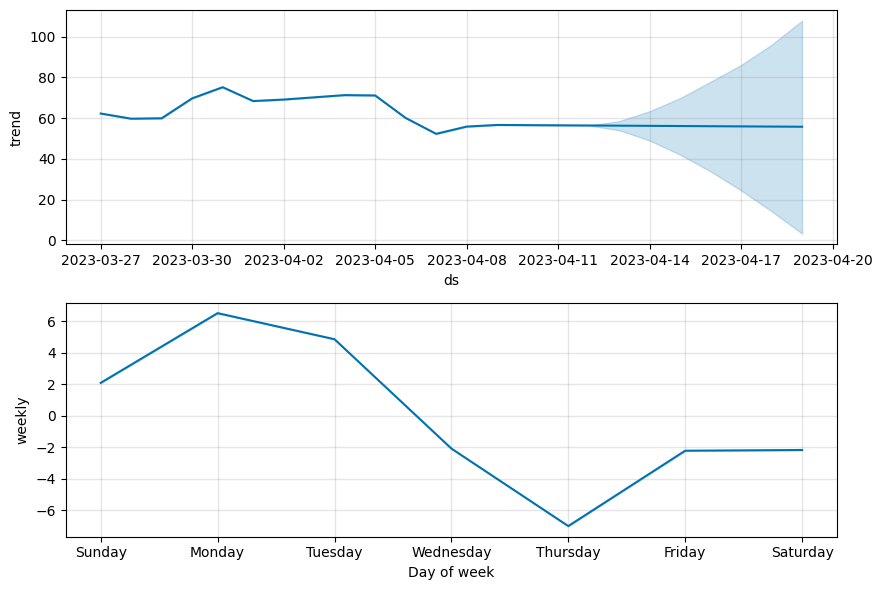

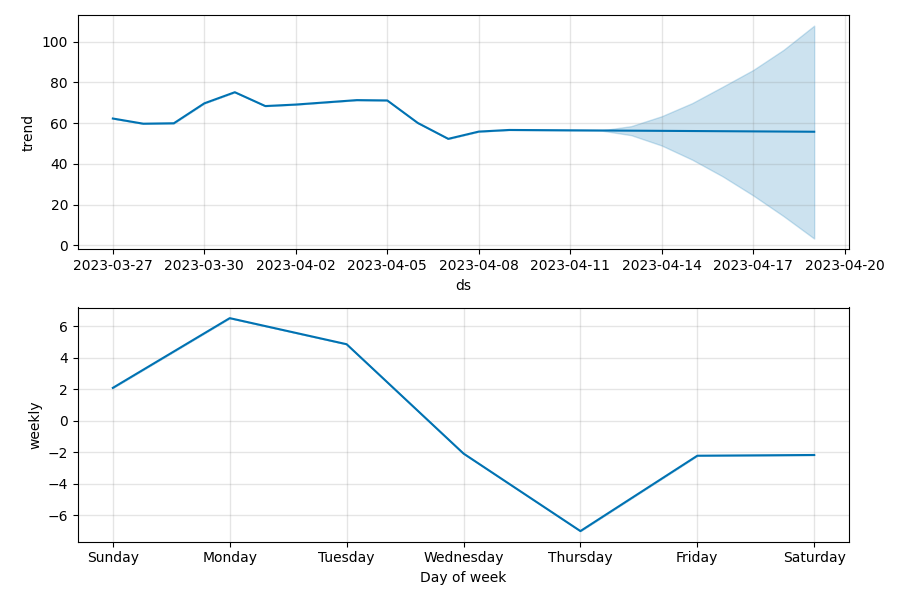

In [16]:
# forcast 2
m.plot_components(tempWeekforecast)

In [17]:
# forcast 3
plot_plotly(m, tempWeekforecast)

In [18]:
# forcast 4
plot_components_plotly(m, tempWeekforecast)

## plotting the 2 week forcasting

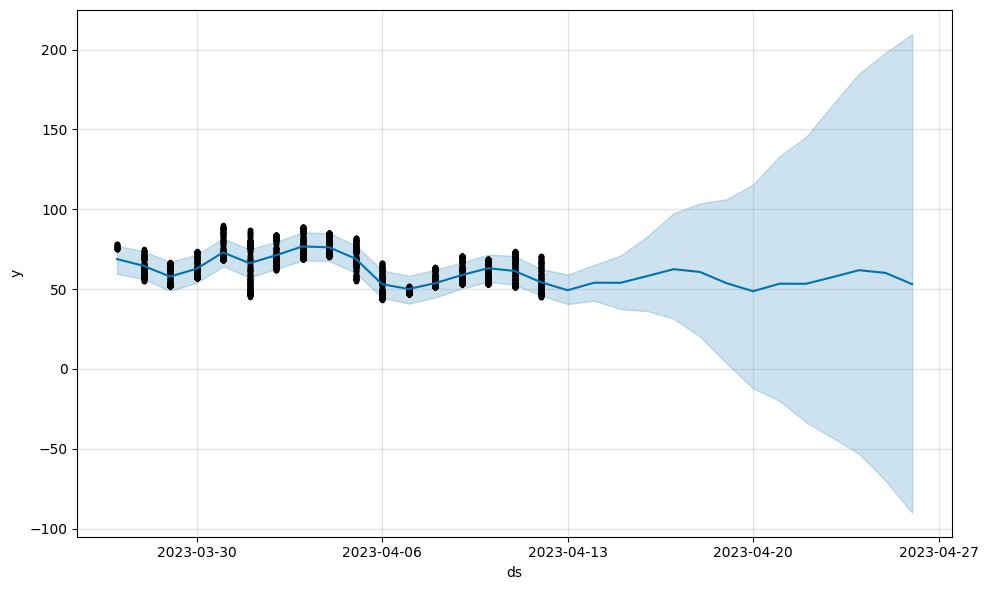

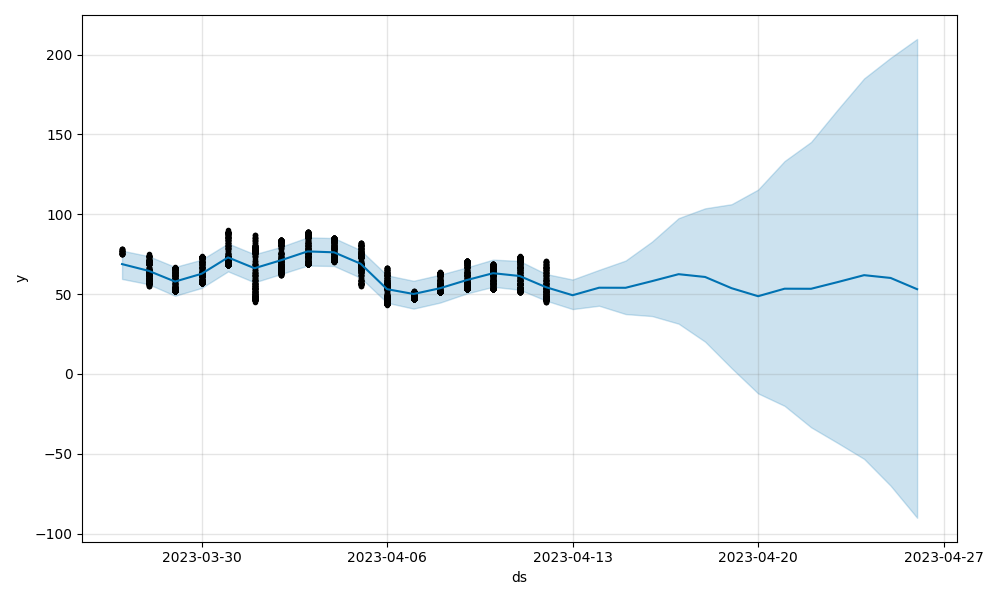

In [19]:
# forcast 1
m.plot(temp2Weekforecast)

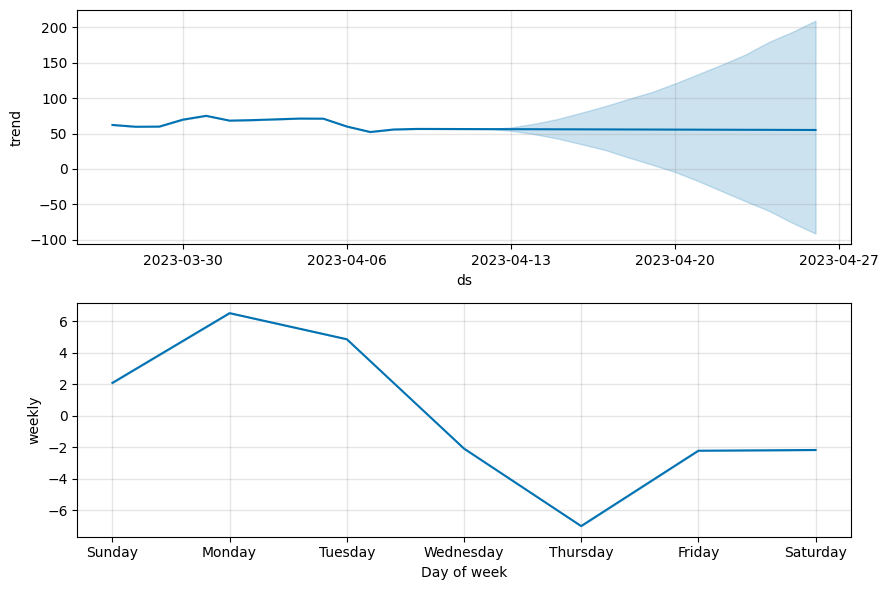

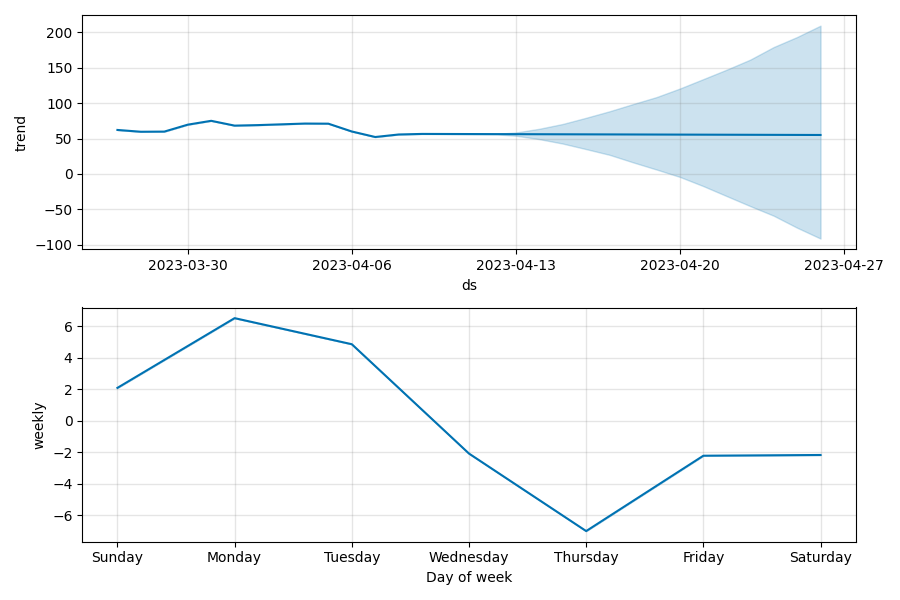

In [20]:
# forcast 2
m.plot_components(temp2Weekforecast)

In [21]:
# forcast 3
plot_plotly(m, temp2Weekforecast)

In [22]:
# forcast 4
plot_components_plotly(m, temp2Weekforecast)

# ARIMA section

## plotting the data

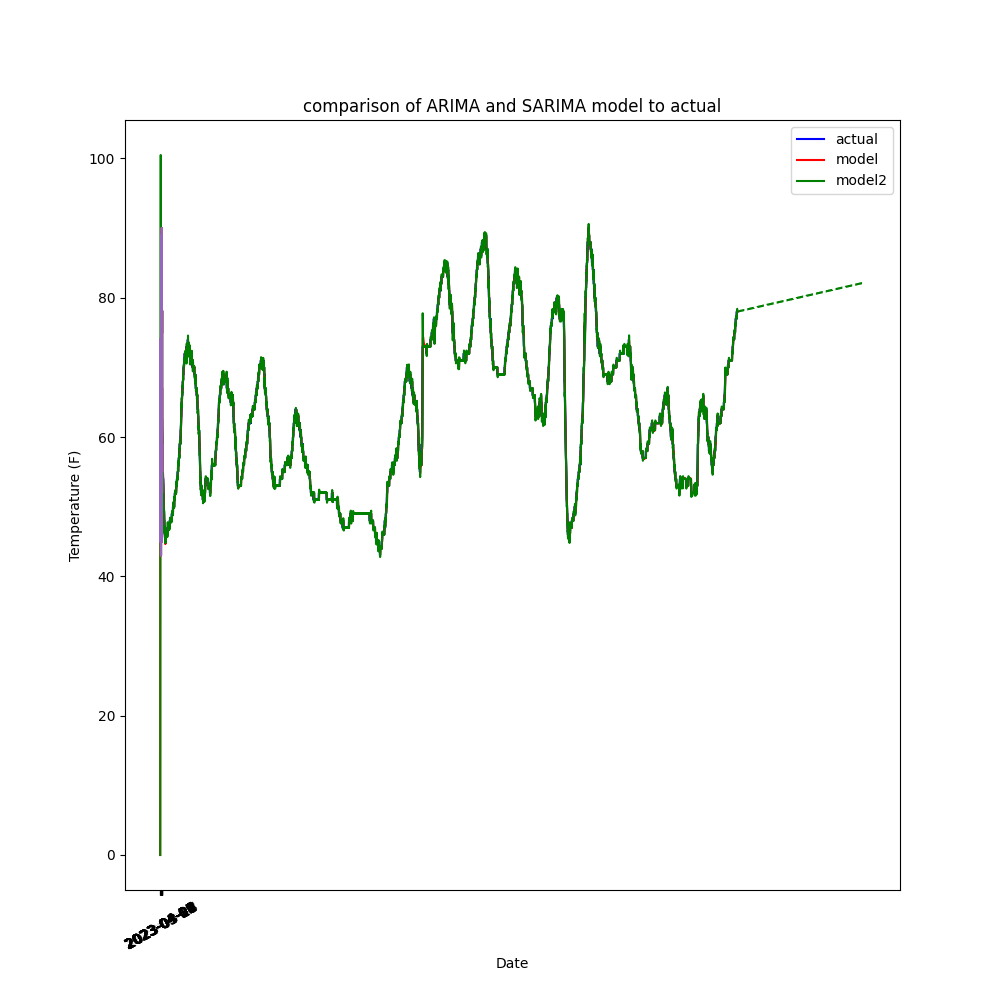

In [49]:
plt.plot(temp1['ds'], temp1['y'])
plt.ylabel('Temperature (F)')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.rcParams['figure.figsize'] = [10, 100]
plt.show()

## testing for stationary

In [24]:
"""
testing for unit root with ACF

"""
def stationarity_test1():
# a1 and c1 are for the ranges of p that should be acceptable
    a1 = 0.001
    a2 = 0.01
    b1 = 0.05
    b2 = 0.001
    c1 = 0.10

    ad_fuller_result = adfuller(temp1['y'])

    p = (ad_fuller_result[1])
    
    ADF1 = (ad_fuller_result[0])
    p1 = (ad_fuller_result[1])

    temp1['log_diff'] = np.log(temp1['y']) # taking that log of the data 
    temp1['log_diff'] = temp1['log_diff'].diff() # taking the difference of the log data
    ad_fuller_result2 = adfuller(temp1['log_diff'][1:])

    ADF2 = (ad_fuller_result2[0])
    p2 = (ad_fuller_result2[1])

    if ((ADF2 and p2) < (ADF1 and p1)) and ((p2 < a1) or (a1 < p2 < a2) or (b1 < p2 < b2)):
        print('this is stationary\n ADF                p-value')
        return ADF2, p2
    elif (ADF2 and p2) > (ADF1 and p1) and ((p1 < a1) or (a1 < p1 < a2) or (b1 < p1 < b2)):
        print('this is stationary\n ADF                p-value')
        return ADF2, p2

stationarity_test1()


this is stationary
 ADF                p-value


(-9.865427014463036, 4.1262846756032555e-17)

## determining best parameters with AIC and the fitting then best model

In [25]:
"""
AR: order of 0-10
I: equals 1 (since we only difference once)
MA: order of 0-10
"""
def optimize_ARIMA(endog, order_list):
    """
        Return dataframe with parameters and corresponding AIC (Akaike Information Criterion)
                                                            ^
                                            This is an estimator of prediction error
        order_list - list with (p, d, q) tuples
        endog - the observed variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=order, simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [26]:
ps = range(0, 10, 1)
d = 1
qs = range(0, 10, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)

In [27]:
result_df = optimize_ARIMA(temp1['y'], order_list)
result_df

  0%|          | 0/100 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(3, 1, 6)",5420.927798
1,"(4, 1, 6)",5421.432465
2,"(6, 1, 4)",5422.146508
3,"(5, 1, 6)",5422.409460
4,"(4, 1, 7)",5422.905654
...,...,...
95,"(1, 1, 1)",5873.949993
96,"(0, 1, 0)",5879.507541
97,"(1, 1, 0)",5881.027583
98,"(0, 1, 1)",5881.118878


In [28]:
"""
fitting the best (p, d, q) Seasonal Auto Regressive Integrated Moving Average 
"""
best_model1 = SARIMAX(temp1['y'], order=(3, 1, 6), simple_differencing=False)
#                                                           ^
#                             Whether or not to use partially conditional maximum likelihood estimation
res = best_model1.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4527
Model:               SARIMAX(3, 1, 6)   Log Likelihood               -2700.464
Date:                Thu, 17 Aug 2023   AIC                           5420.928
Time:                        10:57:19   BIC                           5485.104
Sample:                             0   HQIC                          5443.534
                               - 4527                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7593      0.051    -14.925      0.000      -0.859      -0.660
ar.L2          0.7680      0.022     34.785      0.000       0.725       0.811
ar.L3          0.8535      0.046     18.409      0.0

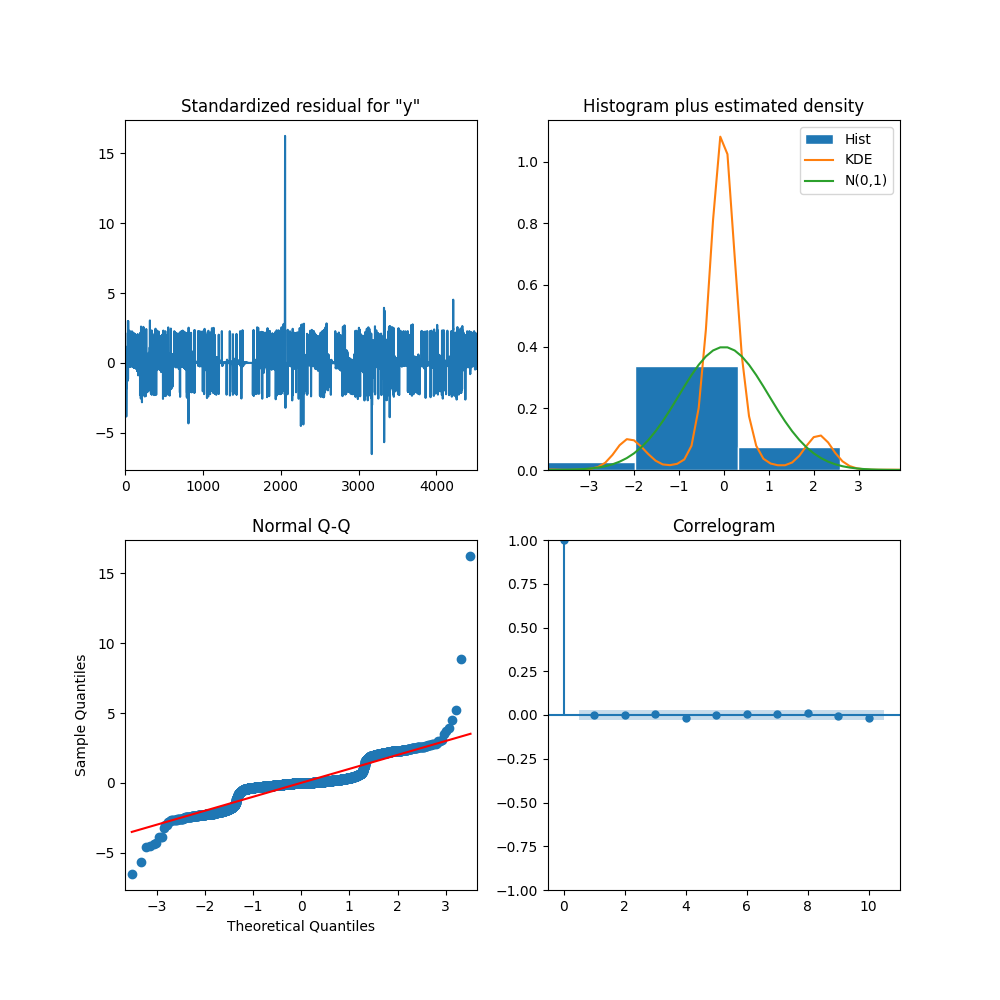

In [29]:
res.plot_diagnostics();

## evaluating forecasting results of the model

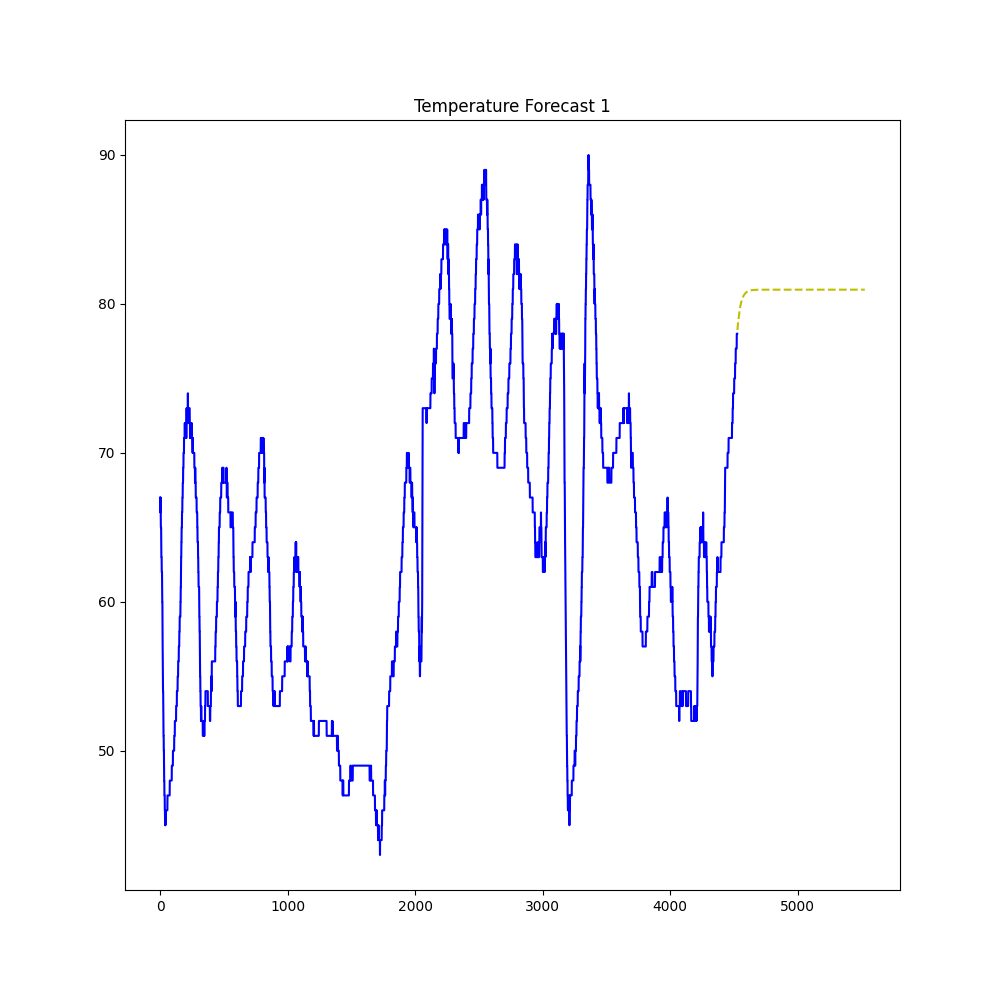

In [30]:
"""
forecasting a predicted mean value
"""
n_forecast = 1000
predict = res.get_prediction(end=best_model1.nobs + n_forecast)
#                                            /\
#                           this means number of observations 
idx1 = np.arange(len(predict.predicted_mean))

fig, ax = plt.subplots()
ax.plot(temp1['y'], 'blue')
ax.plot(idx1[-n_forecast:], predict.predicted_mean[-n_forecast:], 'y--')

ax.set(title = 'Temperature Forecast 1')
plt.show()

In [31]:
temp1['model'] = predict.predicted_mean
temp1

,y,ds,log_diff,model
0,67,2023-04-12,NaN,0.000000
1,67,2023-04-12,0.000000,67.000000
2,66,2023-04-12,-0.015038,67.000002
3,67,2023-04-12,0.015038,66.009221
4,66,2023-04-12,-0.015038,66.856327
...,...,...,...,...
4522,77,2023-03-27,0.000000,77.097521
4523,78,2023-03-27,0.012903,77.120919
4524,78,2023-03-27,0.000000,77.939667
4525,78,2023-03-27,0.000000,78.129070


## taking into account mean squared error value for the model


In [32]:
mse = mean_squared_error(temp1['y'], temp1['model'])
print(f'MSE: {mse}')

MSE: 1.184707845946473


# SARIMA section

## testing for stationary


In [33]:
"""
data_tr_2 is the seasonal difference
data_tr_1 is the log difference 
"""
temp1['seasonal_diff'] = temp1['log_diff'][1:].diff(1)
temp1.head(20)

,y,ds,log_diff,model,seasonal_diff
0,67,2023-04-12,NaN,0.000000,NaN
1,67,2023-04-12,0.000000,67.000000,NaN
2,66,2023-04-12,-0.015038,67.000002,-0.015038
3,67,2023-04-12,0.015038,66.009221,0.030076
4,66,2023-04-12,-0.015038,66.856327,-0.030076
5,65,2023-04-12,-0.015267,66.008606,-0.000230
6,65,2023-04-12,0.000000,64.954863,0.015267
7,65,2023-04-12,0.000000,64.829931,0.000000
8,64,2023-04-12,-0.015504,64.766167,-0.015504
9,63,2023-04-12,-0.015748,63.908979,-0.000244


In [34]:
def stationarity_test2():
    
    a1 = 0.001
    a2 = 0.01
    b1 = 0.05
    b2 = 0.001
    c1 = 0.10

    ad_fuller_result = adfuller(temp1['y'])

    p = (ad_fuller_result[1])
    
    ADF1 = (ad_fuller_result[0])
    p1 = (ad_fuller_result[1])

    temp1['seasonal_diff'] = np.log(temp1['y']) # taking that log of the data 
    temp1['seasonal_diff'] = temp1['seasonal_diff'].diff() # taking the difference of the log data
    ad_fuller_result2 = adfuller(temp1['seasonal_diff'][2:])

    ADF2 = (ad_fuller_result2[0])
    p2 = (ad_fuller_result2[1])

    if ((ADF2 and p2) < (ADF1 and p1)) and ((p2 < a1) or (a1 < p2 < a2) or (b1 < p2 < b2)):
        print('this is stationary\n ADF                p-value')
        return ADF2, p2
    elif (ADF1 and p1) > (ADF1 and p1) and ((p1 < a1) or (a1 < p1 < a2) or (b1 < p1 < b2)):
        print('this is stationary\n ADF                p-value')
        return ADF1, p1

stationarity_test2()


this is stationary
 ADF                p-value


(-9.924245610276833, 2.9355931752212626e-17)

## determining best parameters with AIC and then fitting the best model


In [35]:
def optimize_SARIMA(endog, parameters_list, d, D, s):
    """
        Returns dataframe with parameters and correspondings AIC

        endog           - the observed variable 
        parameters_list - list with (p, q, P, Q) tuples 
        d               - integration order 
        D               - seasonal integration order 
        s               - length of a season
    """

    results = []

    for param in tqdm_notebook(parameters_list):
        try:
            model2 = SARIMAX(endog,
            order = (param[0], d, param[1]),
            seasonal_order = (param[2], D, param[3], s),
            simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model2.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']

    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [36]:
""" the middle value for the range is 2 because it is representing 1/5th of the data (to save computation time) """
p = range(0,2,1)
d = 1
q = range(0,2,1)
P = range(0,2,1)
D = 1
Q = range(0,2,1)
s = 4

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

print(len(parameters_list))
print(parameters_list[:5])

16
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0)]


In [37]:
#                                                         order of differencing 
#                                                         |
#                                                         | seasonal order of differencing
#                                                         |  |  
#                                                         |  |  length of the season
#                                                         |  |  |
#                                                        \/ \/ \/
result_df = optimize_SARIMA(temp1['y'], parameters_list, 1, 1, 2)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 1, 1, 1)",5628.971002
1,"(1, 0, 1, 1)",5629.014585
2,"(1, 1, 1, 1)",5630.813041
3,"(0, 1, 0, 1)",5631.547561
4,"(1, 1, 0, 1)",5632.682617
5,"(1, 0, 0, 1)",5634.477099
6,"(0, 0, 1, 1)",5674.783939
7,"(0, 0, 0, 1)",5675.221882
8,"(1, 1, 1, 0)",6444.688358
9,"(0, 1, 1, 0)",6966.348925


## fitting the best model fit with SARIMAX 

In [38]:
best_model2 = SARIMAX(temp1['y'], order=(2,1,3), seasonal_order=(0,1,0,4), simple_differencing=False)
res = best_model2.fit(disp=False)

print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 4527
Model:             SARIMAX(2, 1, 3)x(0, 1, [], 4)   Log Likelihood               -3313.962
Date:                            Thu, 17 Aug 2023   AIC                           6639.924
Time:                                    10:57:34   BIC                           6678.424
Sample:                                         0   HQIC                          6653.487
                                           - 4527                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7800      0.008    -92.546      0.000      -0.796      -0.763
ar.L2         -0.3853      0.008   

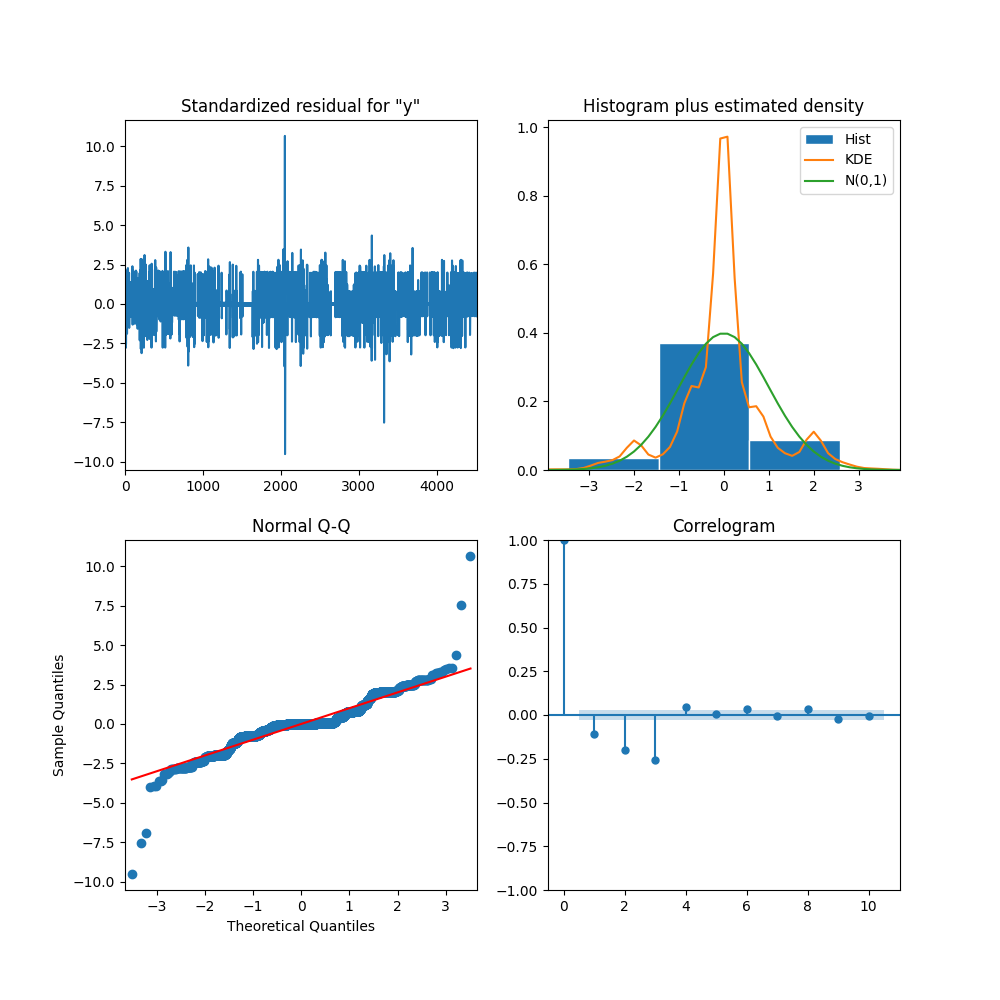

In [39]:
res.plot_diagnostics();

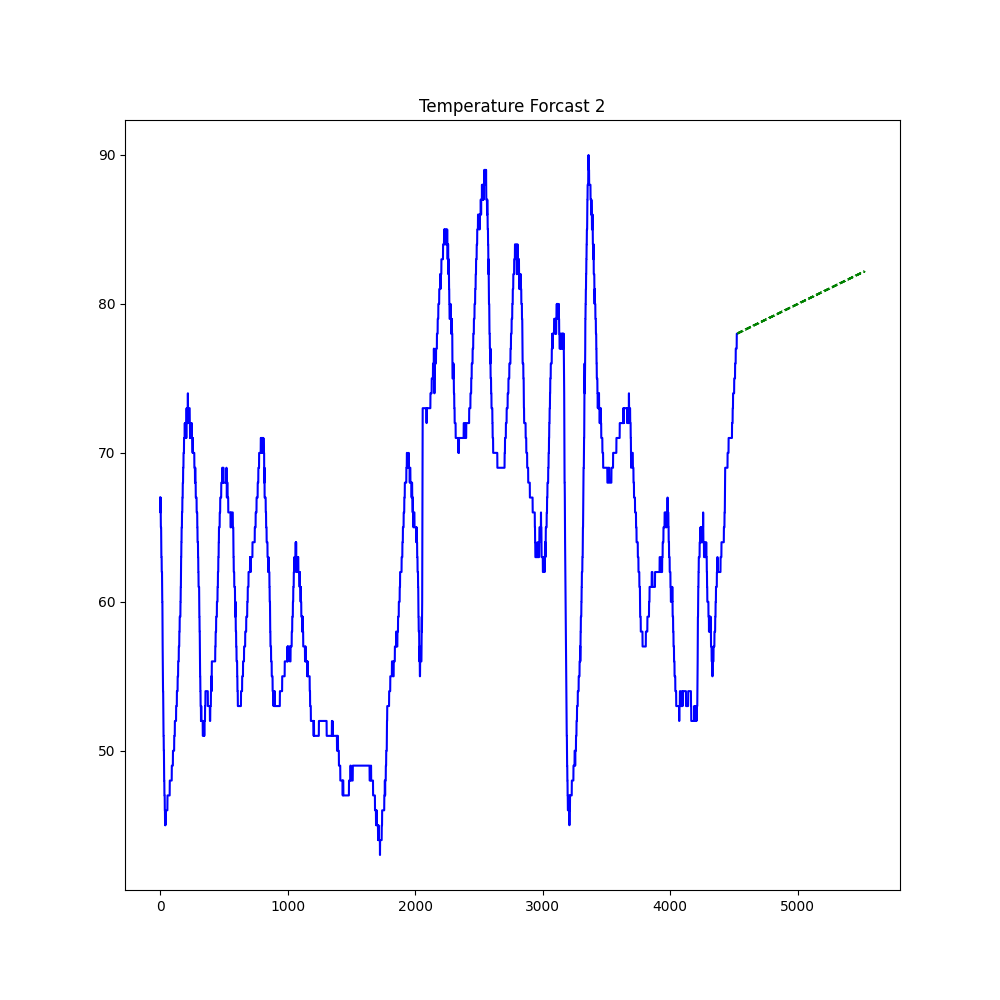

In [40]:
n_forecast = 1000
predict = res.get_prediction(end=best_model2.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))

fig, ax = plt.subplots()
ax.plot(temp1['y'], 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'g--')

ax.set(title='Temperature Forcast 2')
plt.show()

In [41]:
temp1['model2'] = predict.predicted_mean
temp1

,y,ds,log_diff,model,seasonal_diff,model2
0,67,2023-04-12,NaN,0.000000,NaN,0.000000
1,67,2023-04-12,0.000000,67.000000,0.000000,67.000000
2,66,2023-04-12,-0.015038,67.000002,-0.015038,67.000003
3,67,2023-04-12,0.015038,66.009221,0.015038,66.000006
4,66,2023-04-12,-0.015038,66.856327,-0.015038,100.500003
...,...,...,...,...,...,...
4522,77,2023-03-27,0.000000,77.097521,0.000000,77.001660
4523,78,2023-03-27,0.012903,77.120919,0.012903,77.021931
4524,78,2023-03-27,0.000000,77.939667,0.000000,78.211874
4525,78,2023-03-27,0.000000,78.129070,0.000000,78.378850


## taking into account mean squared error value for the model

In [42]:
mse = mean_squared_error(temp1['y'], temp1['model2'])
print(f'MSE: {mse}')

MSE: 1.5085582121973877


# ARIMA and SARIMA comparison

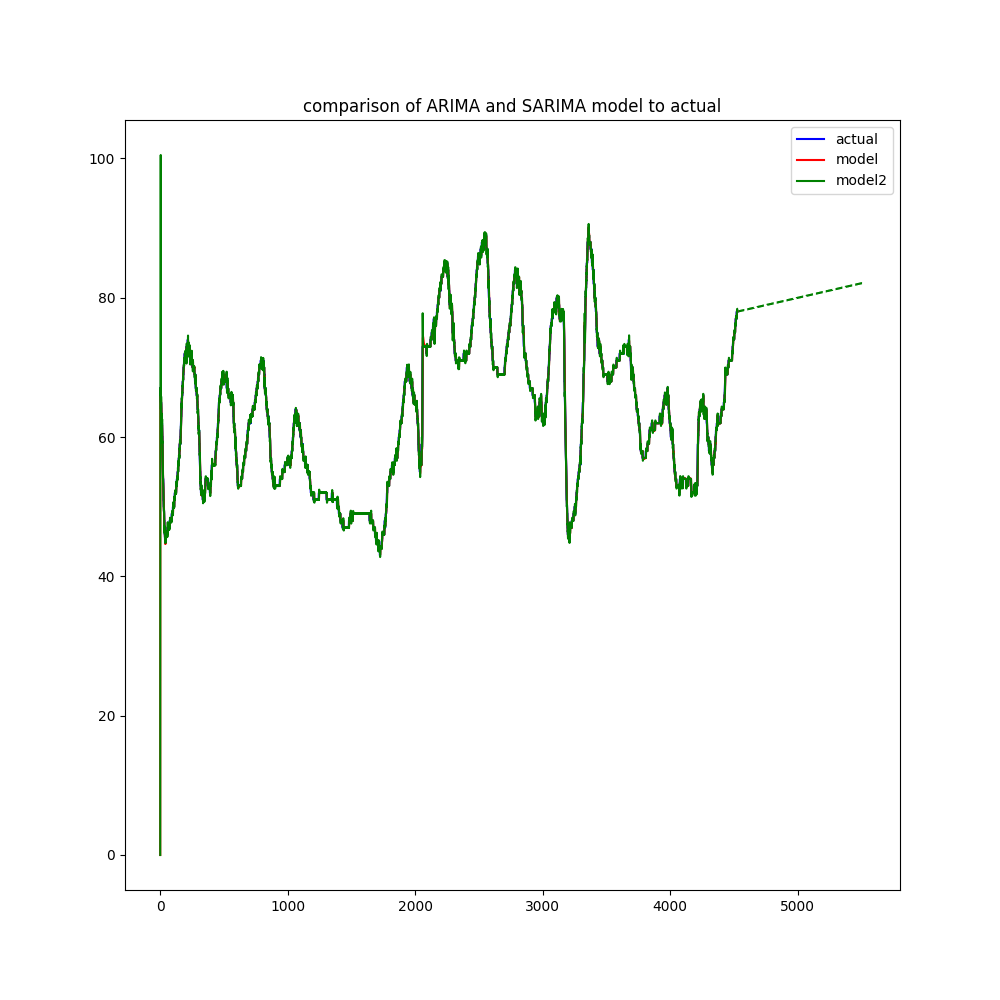

In [43]:
plt.plot(temp1['y'], color='blue', label='actual')
plt.plot(temp1['model'], color='red', label='model')
plt.plot(temp1['model2'], color='green', label='model2')
plt.legend(loc='best')
plt.title('comparison of ARIMA and SARIMA model to actual')
plt.show()